In [1]:
import pandas as pd
data = pd.read_csv("BostonHousing.csv")
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
data.shape


(506, 14)

In [3]:
data.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [4]:
data.isnull().sum()


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [5]:
X = data.drop('medv', axis=1)
y = data['medv']
X.shape, y.shape


((506, 13), (506,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((404, 13), (102, 13))

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 24.291119474973478
R2 Score: 0.6687594935356326


In [9]:
data.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [10]:
data.dtypes


,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [11]:
# New features
data['Rooms_per_House'] = data['rm'] / data['age']          # rooms relative to age
data['Price_per_Room'] = data['medv'] / data['rm']          # price per room
data['LSTAT_per_RM'] = data['lstat'] / data['rm']           # % lower status per room

data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Rooms_per_House,Price_per_Room,LSTAT_per_RM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.100844,3.650190,0.757414
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.081381,3.363962,1.423454
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.117594,4.829506,0.560891
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.152795,4.772792,0.420120
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.131863,5.065062,0.745767


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('medv', axis=1)
y = data['medv']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)


Random Forest MSE: 2.9836356470588234
Random Forest R2: 0.959314308924497


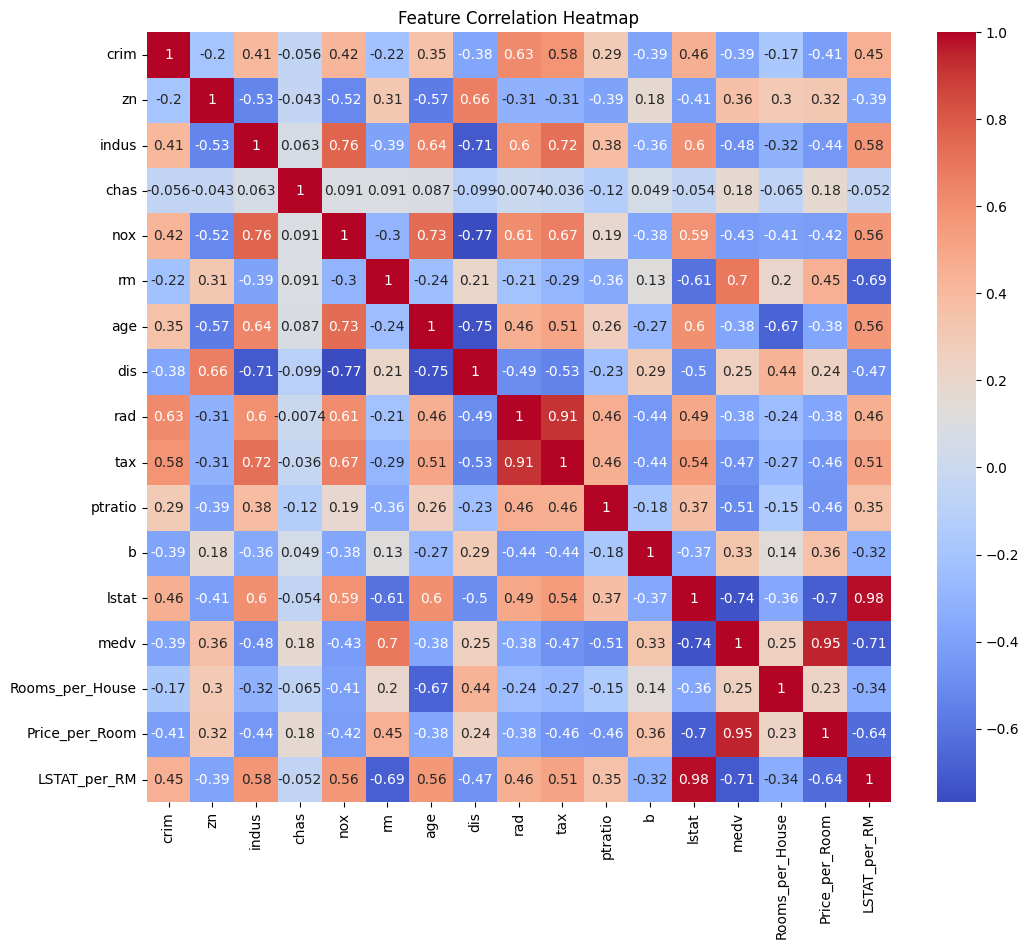

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


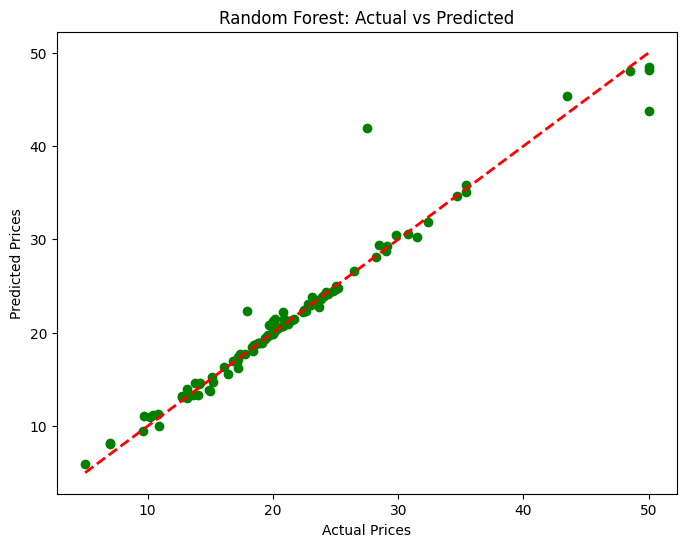

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_rf_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


# HomeSense
# Objective

Predict Boston house prices and showcase feature engineering and model comparison.


# Dataset

*  Boston Housing Dataset – 506 samples, 13 features

*  Source: Boston Housing Dataset


# Data & Features

*   Explored dataset, no missing values

*   Engineered features: Rooms_per_House, Price_per_Room, LSTAT_per_RM


# Models & Evaluation

*   Linear Regression: R² = 0.67, MSE = 24.29
*  Random Forest: R² = 0.96, MSE = 2.98


# Visualizations

*  Correlation Heatmap
*  Predicted vs Actual Scatter Plot



# Insights

### Feature Analysis
- **RM (average number of rooms)** is strongly positively correlated with MEDV, meaning houses with more rooms tend to have higher prices.
- **LSTAT (% lower status population)** is negatively correlated with MEDV, indicating that neighborhoods with higher lower-status population tend to have lower house prices.
- **AGE (proportion of older houses)** has a mild negative correlation, suggesting older houses slightly decrease in value.

### Feature Engineering Impact
- **Rooms_per_House** captures the relationship between room count and house age, adding predictive power.
- **Price_per_Room** provides insight into cost efficiency per room.
- **LSTAT_per_RM** combines socio-economic status with room count, improving model performance.

### Model Comparison
- Linear Regression achieved R² = 0.67, showing a decent linear relationship.
- Random Forest achieved R² = 0.96, showing that non-linear models capture complex patterns more effectively.

### Visual Insights
- Correlation heatmap highlights strong positive and negative relationships.
- Predicted vs Actual scatter plot shows Random Forest’s high accuracy and generalization.


# Conclusion

*   Random Forest outperformed Linear Regression
*  Feature engineering improved model performance

* Demonstrates applied ML skills and creativity




